# Project Objective:

## Problem Statement 

You are a cab rental start-up company. You have successfully run the pilot project and now want to launch your cab service across the country. You have collected the historical data from your pilot project and now have a requirement to apply analytics for fare prediction. You need to design a system that predicts the fare amount for a cab ride in the city.

Importation of useful libraries

In [1]:
import pandas as pd # Importing pandas for performing EDA
import os #getting access to input files
import numpy as np  # Importing numpy for Linear Algebric operations
import seaborn as sns # Importing for Data Visualization
from collections import Counter 
import matplotlib.pyplot as plt # Importing for Data Visualization
from pprint import pprint
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Getting the Current Working directory

In [2]:
os.getcwd()

'C:\\Users\\Hp envy\\Desktop\\All used items\\Edwisor assignments'

Loading the Required Train and Test dataset and showing the first 10 rows in data sets of both training and test sets

In [3]:
Train_Cab=pd.read_csv('TRAIN_CAB.csv')

In [4]:
Train_Cab.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [5]:
Test_Cab=pd.read_csv('test.csv')

In [6]:
Test_Cab.head(10)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
5,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
6,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
7,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
8,2011-10-06 12:10:20 UTC,-74.014099,40.709638,-73.995106,40.741365,1
9,2014-02-18 15:22:20 UTC,-73.969582,40.765519,-73.980686,40.770725,1


After looking at the first glimpse of data, it can be stated that the train_cab data and test_cab data contain same kind of information apart the train_cab data has clearly mentioned the fare amount. the data is prepared upon some units such as date, distance and passenger count.

# 1. DATA UNDERSTANDING

Checking the Shape of both train and test datasets

In [7]:
Train_Cab.shape

(16067, 7)

In [8]:
Test_Cab.shape

(9914, 6)

Checking the Datatypes of both train and test datasets

In [9]:
Train_Cab.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [10]:
Test_Cab.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

With the datatypes, we can observe that the data types of both train and test cab datasets in fare amount and datetime is object types so we need to change the datatype of both in further step to make the process easy and understanding.

In [11]:
Train_Cab.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [12]:
Test_Cab.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# 2.Missing value analysis and Data Cleaning

NOTE-The effective data cleaning is a vital part of analytics process to prepare and validate the data. a short word can be used here which is garbage in-garbage out (GIGO) which means if we go for analysis process without cleaning, a GIGO happens. overall it is needed to create an effective foundation for analysis process.

In [13]:
#converting the dtype
Train_Cab['fare_amount']= pd.to_numeric(Train_Cab['fare_amount'], errors='coerce')

In [14]:
Train_Cab.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [15]:
#converting the pickup object in datetime
from datetime import datetime
import calendar
Train_Cab['pickup_datetime']=pd.to_datetime(Train_Cab['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC', errors='coerce')

In [16]:
Train_Cab.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [17]:
#getting info of each attribute
Train_Cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fare_amount        16042 non-null  float64       
 1   pickup_datetime    16066 non-null  datetime64[ns]
 2   pickup_longitude   16067 non-null  float64       
 3   pickup_latitude    16067 non-null  float64       
 4   dropoff_longitude  16067 non-null  float64       
 5   dropoff_latitude   16067 non-null  float64       
 6   passenger_count    16012 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 878.8 KB


In [18]:
#dropping the NA values in Datetime column
Train_Cab.dropna(subset= ["pickup_datetime"])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00,-73.957027,40.765945,-73.981983,40.779560,1.0


In [19]:
#seperation of pickup_datetime in required field such as year, month, day of the week, day,hour and minute
Train_Cab['year']=Train_Cab['pickup_datetime'].dt.year
Train_Cab['day']=Train_Cab['pickup_datetime'].dt.day
Train_Cab['dayofweek']=Train_Cab['pickup_datetime'].dt.dayofweek
Train_Cab['month']=Train_Cab['pickup_datetime'].dt.month
Train_Cab['hour']=Train_Cab['pickup_datetime'].dt.hour
Train_Cab['minute']=Train_Cab['pickup_datetime'].dt.minute

In [20]:
#rechecking the conversion
Train_Cab.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
day                         float64
dayofweek                   float64
month                       float64
hour                        float64
minute                      float64
dtype: object

The objects dtypes has been succesfully changed in above script

In [21]:
Test_Cab['pickup_datetime']=pd.to_datetime(Test_Cab['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [22]:
#applying same covnersion of test_cab
Test_Cab['year']=Test_Cab['pickup_datetime'].dt.year
Test_Cab['day']=Test_Cab['pickup_datetime'].dt.day
Test_Cab['dayofweek']=Test_Cab['pickup_datetime'].dt.dayofweek
Test_Cab['month']=Test_Cab['pickup_datetime'].dt.month
Test_Cab['hour']=Test_Cab['pickup_datetime'].dt.hour
Test_Cab['minute']=Test_Cab['pickup_datetime'].dt.minute

In [23]:
Test_Cab.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
day                           int64
dayofweek                     int64
month                         int64
hour                          int64
minute                        int64
dtype: object

### Considerations

1.Passenger count should not be exceeded to 6(Note: without observations of SUV).
2.The outlier in pickup_datetime column of value 43.

3.As per the data set, longitudes range varies from -180 to 180 and latitudes ranges varies from -90 to 90.

Checking the datetime variables


In [24]:
#removing the datetime missing values in the rows to removing the adverse impact business impact
Train_Cab = Train_Cab.drop(Train_Cab[Train_Cab['pickup_datetime'].isnull()].index, axis=0)
print(Train_Cab.shape)
print(Train_Cab['pickup_datetime'].isnull())

(16066, 13)
0        False
1        False
2        False
3        False
4        False
         ...  
16062    False
16063    False
16064    False
16065    False
16066    False
Name: pickup_datetime, Length: 16066, dtype: bool


Checking the Passenger count variables

In [25]:
Train_Cab["passenger_count"].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

The descritpions show that there are 5345 passengers which is impractical. to make it practical, reducing the passenger count between 1 to 6 (while considering the SUV) 

In [26]:
Train_Cab=Train_Cab[Train_Cab['passenger_count']<=6]
Train_Cab=Train_Cab[Train_Cab['passenger_count']>=1]

In [27]:
Train_Cab['passenger_count'].describe()

count    15933.000000
mean         1.649677
std          1.265925
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [28]:
#remvoing the values of passengers with the value count of 0
Train_Cab = Train_Cab.drop(Train_Cab[Train_Cab["passenger_count"] == 0 ].index, axis=0)

In [29]:
Train_Cab['passenger_count'].sort_values(ascending=True)

0        1.0
9790     1.0
9791     1.0
9792     1.0
9793     1.0
        ... 
14553    6.0
14552    6.0
4585     6.0
11507    6.0
6061     6.0
Name: passenger_count, Length: 15933, dtype: float64

In [30]:
Train_Cab.shape

(15933, 13)

Checking the Fare amount Variables

In [31]:
Train_Cab['fare_amount'].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15933, dtype: float64

In [32]:
Counter(Train_Cab['fare_amount']<0)

Counter({False: 15930, True: 3})

In [33]:
Train_Cab = Train_Cab.drop(Train_Cab[Train_Cab["fare_amount"]<0].index, axis=0)
Train_Cab.shape

(15930, 13)

In [34]:
#No negative values in the Fare_amount varibales
Train_Cab['fare_amount'].min()

0.0

In [35]:
#removal of rows where the fare_amount=0
Train_Cab = Train_Cab.drop(Train_Cab[Train_Cab["fare_amount"]<1].index, axis=0)
Train_Cab.shape

(15928, 13)

In [36]:
#observations shows that there is a huge difference in 1st, 2nd and 3rd fare_amount so we will limit it by considering the huge amount as outliers
Train_Cab = Train_Cab.drop(Train_Cab[Train_Cab["fare_amount"]> 454 ].index, axis=0)
Train_Cab.shape

(15926, 13)

In [37]:
#elimination of rows for which the values of fare amount is missing in the datasets
Train_Cab = Train_Cab.drop(Train_Cab[Train_Cab['fare_amount'].isnull()].index, axis=0)
print(Train_Cab.shape)

(15902, 13)


In [38]:
print(Train_Cab['fare_amount'].isnull().sum())

0


In [39]:
Train_Cab['fare_amount'].describe()

count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [40]:
#clearing the longitude and lattitude rows by dropping out the range mentioned below:
#longitude(-90 to +90)
#lattitude(-180 to-180)
Train_Cab[Train_Cab['pickup_latitude']<-90]
Train_Cab[Train_Cab['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,dayofweek,month,hour,minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,30.0,5.0,7.0,11.0,15.0


In [41]:
Train_Cab[Train_Cab['pickup_longitude']<-180]
Train_Cab[Train_Cab['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,dayofweek,month,hour,minute


In [42]:
Train_Cab[Train_Cab['dropoff_latitude']<-90]
Train_Cab[Train_Cab['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,dayofweek,month,hour,minute


In [43]:
Train_Cab[Train_Cab['dropoff_longitude']<-180]
Train_Cab[Train_Cab['dropoff_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,dayofweek,month,hour,minute


In [44]:
#index 5686 has the lattitude less than -90 so after dropping it, we get
Train_Cab=Train_Cab.drop((Train_Cab[Train_Cab['pickup_latitude']<-90]).index, axis=0)
Train_Cab=Train_Cab.drop((Train_Cab[Train_Cab['pickup_latitude']>90]).index, axis=0)
Train_Cab.shape

(15901, 13)

In [45]:
Train_Cab.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
day                  0
dayofweek            0
month                0
hour                 0
minute               0
dtype: int64

In [46]:
Test_Cab.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
day                  0
dayofweek            0
month                0
hour                 0
minute               0
dtype: int64

So far, the data has been cleaned by exploring the practical aspects and with using multiple approaches, here are some high level approaches that are used is mentioned below:

1.Get rid of unwanted observations:eliminated the rows in which the fare amount is missing.

2.Fix structured error:(a).changed the Datatypes,(b).dropping the fare>0

3.standardized the data:(a).changed the values count,(b).No negative values,(c).clearing the longitude and lattitude for easy understanding.

The process was done in both the test and train datasets.

### The data has been cleaned succesfully so now here we can proceed for the further data set operations

Calculating the distance by using latlong

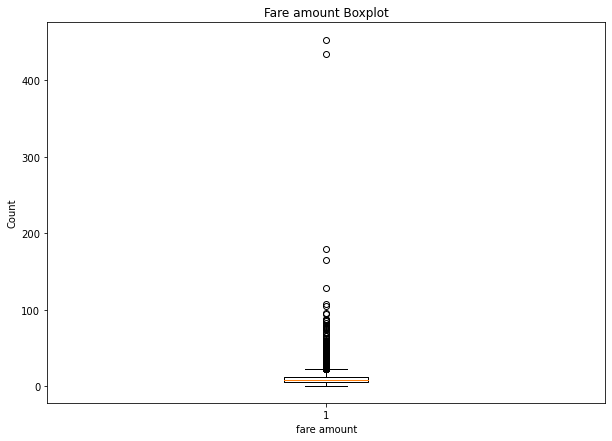

In [47]:
#outlier analysis
plt.figure(figsize=(10,7))
plt.boxplot(Train_Cab['fare_amount'])
plt.xlabel('fare amount')
plt.ylabel('Count')
plt.title('Fare amount Boxplot')
plt.show()

In [48]:
#as described in the above code script, the values of lattitude and longitude are given
#so formulatng the distance with the help of latlong which is also kn own as Haversine formula which will create a new variable called distance


#importing useful functions set from math 
from math import cos, sin, asin, sqrt,radians

In [49]:
#calculating the distance between any two point(Specified in the decimal degrees)
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    lon1,lat1,lon2,lat2=map(radians,[lon1,lat1,lon2,lat2])
    dlon=lon2-lon1
    dlat=lat2-lat1
    
    #formula implications(Haversine formula)
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    #conversion in km
    km = 6371* c
    return km

In [50]:
Train_Cab['distance'] = Train_Cab[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [51]:
Test_Cab['distance'] = Test_Cab[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [52]:
Train_Cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,dayofweek,month,hour,minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,15.0,0.0,6.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,5.0,1.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,18.0,3.0,8.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,21.0,5.0,4.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,9.0,1.0,3.0,7.0,51.0,1.999157


In [53]:
Test_Cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,dayofweek,month,hour,minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,27,1,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,27,1,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,8,5,10,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,1,5,12,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,1,5,12,21,12,5.387301


In [54]:
Train_Cab.nunique()

fare_amount            459
pickup_datetime      15856
pickup_longitude     13672
pickup_latitude      14110
dropoff_longitude    13763
dropoff_latitude     14136
passenger_count          7
year                     7
day                     31
dayofweek                7
month                   12
hour                    24
minute                  60
distance             15448
dtype: int64

In [55]:
Test_Cab.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
year                    7
day                    31
dayofweek               7
month                  12
hour                   24
minute                 60
distance             9830
dtype: int64

In [56]:
#setting the fare in ascending order to find whether the outliers are present or not
Train_Cab['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
13050       0.000000
11593       0.000000
2346        0.000000
8331        0.000000
1637        0.000000
Name: distance, Length: 15901, dtype: float64

The above script shows that some of the values are very high which means that there are more than 8000 kms have been travelled by some of the passengers so clearly stated that the dataset has some outlier and it is needed to be removed

In [57]:
Counter(Train_Cab['distance']==0)

Counter({False: 15447, True: 454})

In [58]:
Counter(Test_Cab['distance']==0)

Counter({False: 9829, True: 85})

In [59]:
Counter(Train_Cab['fare_amount']==0)

Counter({False: 15901})

In [60]:
#remvoing the rows holding the zero value for distance
Train_Cab=Train_Cab.drop(Train_Cab[Train_Cab['distance']==0].index, axis=0)

In [61]:
Train_Cab.shape

(15447, 14)

In [62]:
#removing the shape distance values>129 kms
Train_Cab=Train_Cab.drop(Train_Cab[Train_Cab['distance']>130].index, axis=0)

In [63]:
Train_Cab.shape

(15424, 14)

In [64]:
Train_Cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,dayofweek,month,hour,minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,15.0,0.0,6.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,5.0,1.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,18.0,3.0,8.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,21.0,5.0,4.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,9.0,1.0,3.0,7.0,51.0,1.999157


The pickup_time data has been splitted in required format like month, year, dayofweek etc so we can drop the pickup_date time variables from both the train and test data. the other variables such as drop longitude and lattitude can be dropped as pickup distance is considering in both the datasets 

In [65]:
#dropping the longitude and lattitude from both the train-test data
Drop_Train_Cab = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'minute']
Train_Cab = Train_Cab.drop(Drop_Train_Cab, axis = 1)

In [66]:
Drop_Test_Cab = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'minute']
Test_Cab = Test_Cab.drop(Drop_Test_Cab, axis = 1)

In [67]:
Train_Cab.head()

,fare_amount,passenger_count,year,day,dayofweek,month,hour,distance
0,4.5,1.0,2009.0,15.0,0.0,6.0,17.0,1.030764
1,16.9,1.0,2010.0,5.0,1.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,18.0,3.0,8.0,0.0,1.389525
3,7.7,1.0,2012.0,21.0,5.0,4.0,4.0,2.799270
4,5.3,1.0,2010.0,9.0,1.0,3.0,7.0,1.999157


In [68]:
Test_Cab.head()

,passenger_count,year,day,dayofweek,month,hour,distance
0,1,2015,27,1,1,13,2.323259
1,1,2015,27,1,1,13,2.425353
2,1,2011,8,5,10,11,0.618628
3,1,2012,1,5,12,21,1.961033
4,1,2012,1,5,12,21,5.387301


In [69]:
Train_Cab.dtypes

fare_amount        float64
passenger_count    float64
year               float64
day                float64
dayofweek          float64
month              float64
hour               float64
distance           float64
dtype: object

In [70]:
#changing the dtypes of train dataset in required type
Train_Cab['passenger_count'] = Train_Cab['passenger_count'].astype('int64')
Train_Cab['year'] = Train_Cab['year'].astype('int64')
Train_Cab['month'] = Train_Cab['month'].astype('int64')
Train_Cab['dayofweek'] = Train_Cab['dayofweek'].astype('int64')
Train_Cab['day'] = Train_Cab['day'].astype('int64')
Train_Cab['hour'] = Train_Cab['hour'].astype('int64')

In [71]:
Train_Cab.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
day                  int64
dayofweek            int64
month                int64
hour                 int64
distance           float64
dtype: object

In [72]:
Test_Cab.dtypes

passenger_count      int64
year                 int64
day                  int64
dayofweek            int64
month                int64
hour                 int64
distance           float64
dtype: object

# 3.Visual Observations

Text(0.5, 1.0, 'Fare Amount vs passenger count')

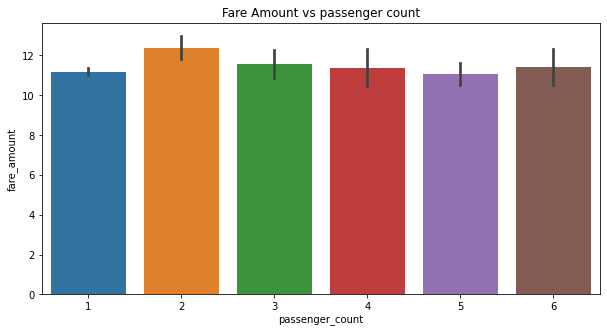

In [73]:
plt.figure(figsize=(10,5))
sns.barplot(x='passenger_count',y='fare_amount',data=Train_Cab).set_title("Fare Amount vs passenger count")

Observation-It can be stated that 2 is the most common passneger count with the high level of fare amount. Here the fare amount is measured according the distance travelled. A Cab with the passenger count=2 has travelled the most. Other passenger counts are showing almost same kind of observations

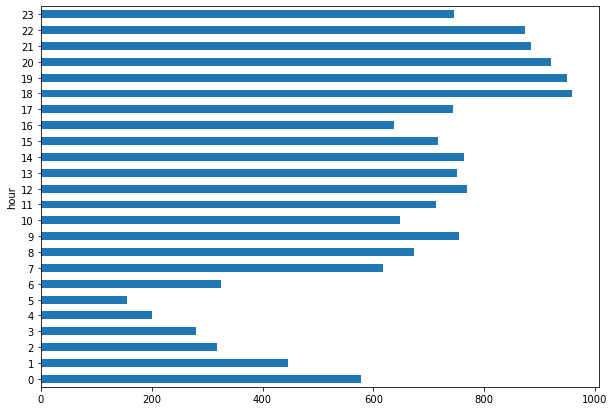

In [74]:
plt.figure(figsize=(10,7))
Train_Cab.groupby(Train_Cab['hour'])['hour'].count().plot(kind='barh')
plt.show()

Observation-Lowest cabs at early morning (5:00am) and and highest cab at the between office rush hours(18:00pm and 19:00pm)

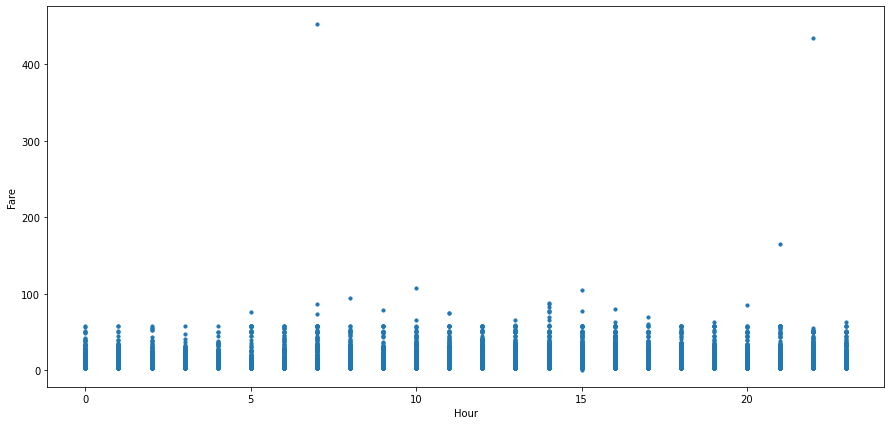

In [75]:
#A time and fare relation visualiazation
plt.figure(figsize=(15,7))
plt.scatter(x=Train_Cab['hour'], y=Train_Cab['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

With the observation, it can be seen that the cab fare at early morning at 7:00 am and late night at 23:00 pm are the costliest.

count    15424.000000
mean        11.371203
std         10.674382
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

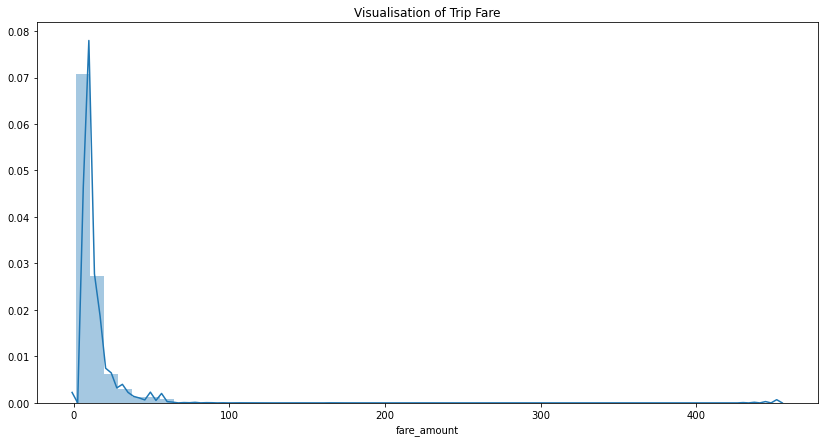

In [76]:
plt.figure(figsize=(14,7))
sns.distplot(Train_Cab['fare_amount']).set_title("Visualisation of Trip Fare")
Train_Cab.loc[Train_Cab['fare_amount']<0].shape
Train_Cab["fare_amount"].describe()

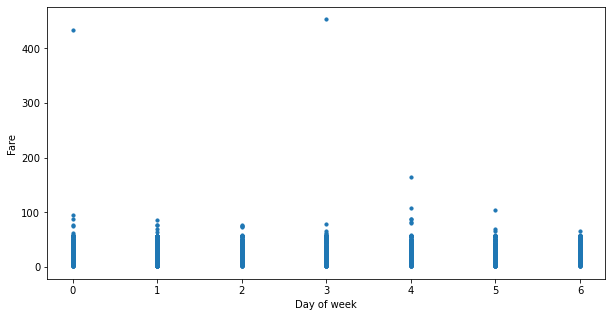

In [77]:
#fare and days visualization
plt.figure(figsize=(10,5))
plt.scatter(x=Train_Cab['dayofweek'], y=Train_Cab['fare_amount'],s=10)
plt.xlabel('Day of week')
plt.ylabel('Fare')
plt.show()

Highest fare on sunday, monday and thursday. lowest fare at wednesday and saturday.
the cab fare is low and high demand of cabs on sunday and monday shows the high fare prices. may be low demands on weekend

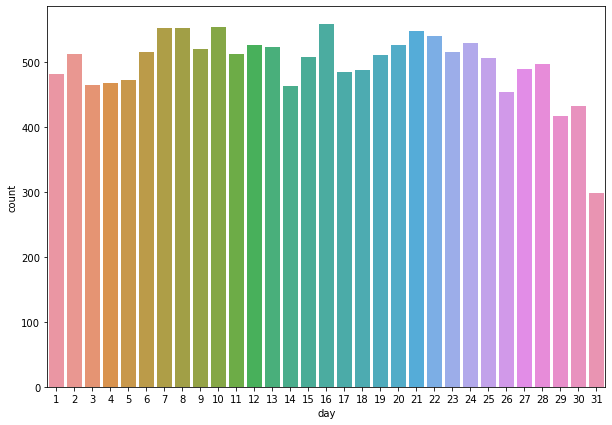

In [78]:
#impact of the day on the numbers of cab rides
plt.figure(figsize=(10,7))
sns.countplot(x='day', data=Train_Cab)
plt.show()

Observation-It seems that cab rides are affected at the starting and ending of the month

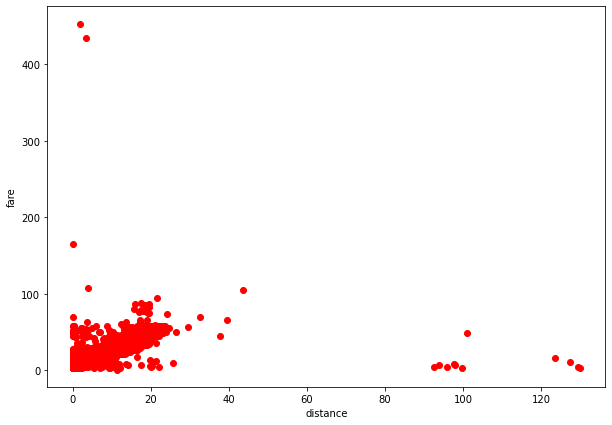

In [79]:
#relationship between distance and fare
plt.figure(figsize=(10,7))
plt.scatter(x=Train_Cab['distance'], y=Train_Cab['fare_amount'], c="r")
plt.xlabel('distance')
plt.ylabel('fare')
plt.show()

The cab fare is increasing with the distance which is an obvious statement

# 4.Feature Scaling:

fare_amount


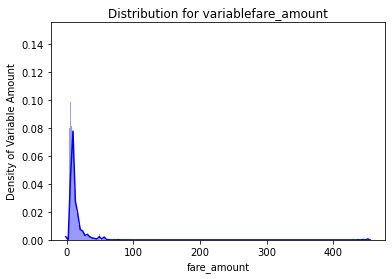

distance


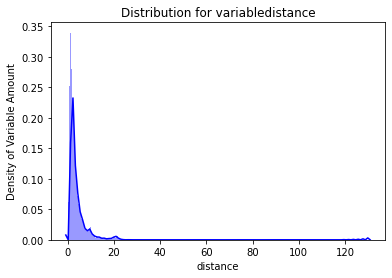

In [80]:
#checking the normalization whether the training data is uniformly data is uniformly distributed or not
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(Train_Cab[i],bins='auto', color='blue')
    plt.title("Distribution for variable"+i)
    plt.ylabel('Density of Variable Amount')
    plt.show()

The above observation shows that the skewness of target variable(distance, fare_amount) is high which is needed to be reduced by performing log transform

In [81]:
Train_Cab['fare_amount']=np.log1p(Train_Cab['fare_amount'])
Train_Cab['distance']=np.log1p(Train_Cab['distance'])

fare_amount


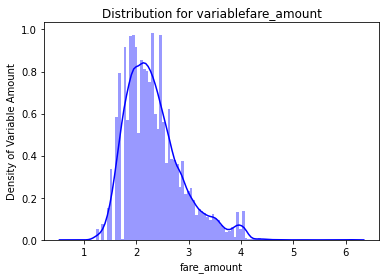

distance


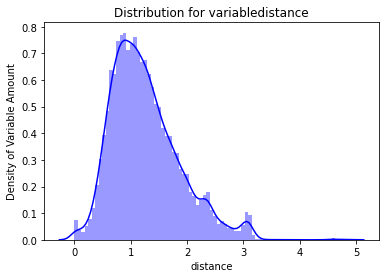

In [82]:
#rechecking if the data is uniformly distributed now or not
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(Train_Cab[i],bins='auto', color='blue')
    plt.title("Distribution for variable"+i)
    plt.ylabel('Density of Variable Amount')
    plt.show()

The bell shaped curved shown in the above visaulize area which means that the continuous variable are now normally distributed so there is no need of using the feature scalling technique i.e normalization or standardization 

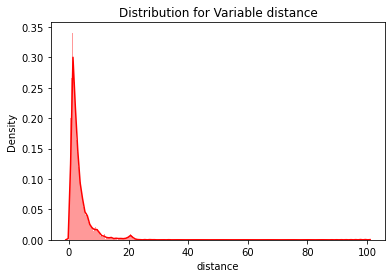

In [83]:
#similarly checking for the test data if it is uniformly distributed or not
sns.distplot(Test_Cab['distance'],bins='auto',color='red')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

skewness of the distance is high which can be reduced by applying the log transform

In [84]:
Test_Cab['distance']=np.log1p(Test_Cab['distance'])

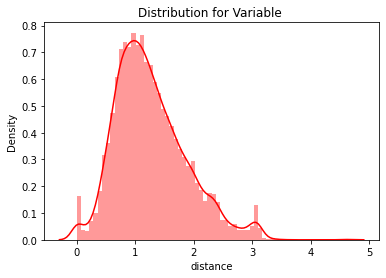

In [85]:
#rechecking the distribution again
sns.distplot(Test_Cab[i],bins='auto',color='red')
plt.title("Distribution for Variable ")
plt.ylabel("Density")
plt.show()

The bel shaped curved is again showing that there is no need of feature scalling i.e, Normalization or Standardization as the continuous variable are normally distributed

# 5.Model Selection

In [86]:
Train_Cab.head()

,fare_amount,passenger_count,year,day,dayofweek,month,hour,distance
0,1.704748,1,2009,15,0,6,17,0.708412
1,2.884801,1,2010,5,1,1,16,2.246029
2,1.902108,2,2011,18,3,8,0,0.871095
3,2.163323,1,2012,21,5,4,4,1.334809
4,1.840550,1,2010,9,1,3,7,1.098331


In [87]:
x=Train_Cab[['passenger_count','year','day','dayofweek','month','hour','distance']]
y=Train_Cab[['fare_amount']]

In [88]:
#spliting the dataset for further process
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.20, random_state = 1)

In [89]:
xtrain.shape

(12339, 7)

In [90]:
xtest.shape

(3085, 7)

In [91]:
ytrain.shape

(12339, 1)

In [92]:
ytest.shape

(3085, 1)

# Linear Regression Model:

In [93]:
LR_Fit_Cab= LinearRegression().fit(xtrain,ytrain)

In [94]:
#prediction on both train and test data
pred_Train_LR=LR_Fit_Cab.predict(xtrain)
pred_Test_LR=LR_Fit_Cab.predict(xtest)

In [95]:
##calculating RMSE for train data
RMSE_Train_LR = np.sqrt(mean_squared_error(ytrain, pred_Train_LR))

##calculating RMSE for test data
RMSE_Test_LR = np.sqrt(mean_squared_error(ytest, pred_Test_LR))

In [96]:
print("Root Mean Squared Error For Training data = "+str(RMSE_Train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_Test_LR))

Root Mean Squared Error For Training data = 0.2753110017967316
Root Mean Squared Error For Test data = 0.24540661786977536


In [97]:
## R^2 calculation for train data
r2_score(ytrain, pred_Train_LR)

0.7495502651880399

In [98]:
## R^2 calculation for train data
r2_score(ytest, pred_Test_LR)

0.7827019104296634

## Gradient Boosting Model:

In [99]:
#building a model on top of training dataset
GB_Fit_Cab=GradientBoostingRegressor().fit(xtrain,ytrain)

In [100]:
#prediction on both train and test data
pred_Train_GB=GB_Fit_Cab.predict(xtrain)
pred_Test_GB=GB_Fit_Cab.predict(xtest)

In [101]:
#calculating the RMSE(root mean squared error) for train and test data
RMSE_Train_GB=np.sqrt(mean_squared_error(ytrain, pred_Train_GB))
RMSE_Test_GB=np.sqrt(mean_squared_error(ytest, pred_Test_GB))
print("RMSE for training data="+str(RMSE_Train_GB))
print("RMSE for training data="+str(RMSE_Test_GB))

RMSE for training data=0.22754316149645537
RMSE for training data=0.22762963028460628


In [102]:
#calculating the R2 score for train and test data
r2_score(ytrain, pred_Train_GB)

0.8289193000175024

In [103]:
r2_score(ytest,pred_Test_GB)

0.8130433343540475

# Decision Tree Model:

In [104]:
DT_Fit_Cab= DecisionTreeRegressor(max_depth = 2).fit(xtrain,ytrain)

In [105]:
#prediction on both train and test data
pred_Train_DT=DT_Fit_Cab.predict(xtrain)
pred_Test_DT=DT_Fit_Cab.predict(xtest)

In [106]:
##calculating RMSE for train data
RMSE_Train_DT = np.sqrt(mean_squared_error(ytrain, pred_Train_DT))

##calculating RMSE for test data
RMSE_Test_DT = np.sqrt(mean_squared_error(ytest, pred_Test_DT))

In [107]:
print("Root Mean Squared Error For Training data = "+str(RMSE_Train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_Test_DT))

Root Mean Squared Error For Training data = 0.2996210902077019
Root Mean Squared Error For Test data = 0.28674606171586176


In [108]:
## R^2 calculation for train data
r2_score(ytrain, pred_Train_DT)

0.7033678616157003

In [109]:
## R^2 calculation for train data
r2_score(ytest, pred_Test_DT)

0.7033268167661033

# Random Forest Model:

In [110]:
RF_Fit_Cab= RandomForestRegressor(n_estimators=200).fit(xtrain,ytrain)

In [111]:
#prediction on both train and test data
pred_Train_RF=RF_Fit_Cab.predict(xtrain)
pred_Test_RF=RF_Fit_Cab.predict(xtest)

In [112]:
##calculating RMSE for train data
RMSE_Train_RF = np.sqrt(mean_squared_error(ytrain, pred_Train_RF))

##calculating RMSE for test data
RMSE_Test_RF = np.sqrt(mean_squared_error(ytest, pred_Test_RF))

In [113]:
print("Root Mean Squared Error For Training data = "+str(RMSE_Train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_Test_RF))

Root Mean Squared Error For Training data = 0.09526122555451313
Root Mean Squared Error For Test data = 0.23562253296762956


In [114]:
## R^2 calculation for train data
r2_score(ytrain, pred_Train_RF)

0.9700148813470941

In [115]:
## R^2 calculation for train data
r2_score(ytest, pred_Test_RF)

0.7996833684697074

# New Results Optimizations With Parameters Tuning:

In [116]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [117]:
##Random Hyperparameter Grid
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [118]:
##Random Search CV on Random Forest Model
RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

In [119]:
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(xtrain,ytrain)
predictions_RRF = randomcv_rf.predict(xtest)
view_best_params_RRF = randomcv_rf.best_params_
best_model = randomcv_rf.best_estimator_
predictions_RRF = best_model.predict(xtest)

In [120]:
#R^2
RRF_r2 = r2_score(ytest, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(ytest,predictions_RRF))
print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.8.
RMSE =  0.23808727180650585


In [121]:
#applying same approach with other used modules
GB = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(GB.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [122]:
##Random Search CV on gradient boosting model
GB = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))
# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}
randomcv_GB = RandomizedSearchCV(GB, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_GB = randomcv_GB.fit(xtrain,ytrain)
predictions_GB = randomcv_GB.predict(xtest)
view_best_params_GB = randomcv_GB.best_params_
best_model = randomcv_GB.best_estimator_
predictions_GB = best_model.predict(xtest)

In [123]:
#R^2
GB_r2 = r2_score(ytest, predictions_GB)
#Calculating RMSE
GB_rmse = np.sqrt(mean_squared_error(ytest,predictions_GB))
print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_GB)
print('R-squared = {:0.2}.'.format(GB_r2))
print('RMSE = ', GB_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.77.
RMSE =  0.252068617563449


In [124]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(xtrain,ytrain)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(xtest)

#R^2
GRF_r2 = r2_score(ytest, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(ytest,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 15}
R-squared = 0.8.
RMSE =  0.23726589515356786


In [125]:
## Grid Search CV for gradinet boosting
GB = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_GB = GridSearchCV(GB, param_grid = grid_search, cv = 5)
gridcv_GB = gridcv_GB.fit(xtrain,ytrain)
view_best_params_GGB = gridcv_GB.best_params_

#Apply model on test data
predictions_GGB = gridcv_GB.predict(xtest)

#R^2
GGB_r2 = r2_score(ytest, predictions_GGB)
#Calculating RMSE
GGB_rmse = np.sqrt(mean_squared_error(ytest,predictions_GGB))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_GGB)
print('R-squared = {:0.2}.'.format(GGB_r2))
print('RMSE = ',(GGB_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.8.
RMSE =  0.23710447553831585


# Predicting the Fare from Test_Cab Dataset:

The Dataset(train and test) has been cleaned and tested by applying the sutiable algorithm and now, the prediction will be done with the help of using the Random Forest model as it shows overall good r2 score which is around 0.96.

In [126]:
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [127]:
# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

In [128]:
## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(xtrain,ytrain)
view_best_params_GRF = gridcv_rf.best_params_

In [129]:
predictions_GRF_test_Df = gridcv_rf.predict(Test_Cab)

In [130]:
predictions_GRF_test_Df

array([2.37543359, 2.39413478, 1.68070503, ..., 4.00620024, 3.30834716,
       2.04017073])

In [131]:
Test_Cab['Predicted_fare'] = predictions_GRF_test_Df

In [132]:
Test_Cab.head(20)

,passenger_count,year,day,dayofweek,month,hour,distance,Predicted_fare
0,1,2015,27,1,1,13,1.200946,2.375434
1,1,2015,27,1,1,13,1.231205,2.394135
2,1,2011,8,5,10,11,0.481579,1.680705
3,1,2012,1,5,12,21,1.085538,2.218272
4,1,2012,1,5,12,21,1.854312,2.786595
5,1,2012,1,5,12,21,1.440439,2.403619
6,1,2011,6,3,10,12,0.657313,1.820922
7,1,2011,6,3,10,12,3.115296,3.968985
8,1,2011,6,3,10,12,1.583907,2.468157
9,1,2014,18,1,2,15,0.741839,2.010246


In [133]:
Test_Cab['Predicted_fare'].mean()

2.3503101708530076

In [134]:
Test_Cab['distance'].mean()

1.2708788853561324

Here, we have successfully predicted the fare of cab with an average fare ($2.35) for average 1.27 Km

In [135]:
Test_Cab.to_csv('Test_Cab.csv')

# Thank You